<a href="https://colab.research.google.com/github/ZHAbotorabi/Supply-Chain/blob/main/Cross_Learning_AutoMl_OTB_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.7 MB/s eta 0:00:00
  Preparing meta

In [ ]:
from pycaret.regression import *

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
sales= pd.read_csv('sales.csv')

In [ ]:
sales.head()

,date,store_name,dept,family,subfamily,section,brand,size,color,product,unit_price,revenue,price_total,qty
0,2021-01-01,store_1,department_1,family_1,subfamily_1,section_1,brand_1,size_1,color_1,sku_1,1173.0,1117.14286,1173.0,1
1,2021-01-01,store_1,department_2,family_2,subfamily_2,section_2,brand_2,size_1,color_2,sku_2,514.0,489.52381,514.0,1
2,2021-01-01,store_1,department_1,family_3,subfamily_3,section_1,brand_3,size_1,color_1,sku_3,249.0,237.14286,249.0,1
3,2021-01-01,store_1,department_3,family_4,subfamily_4,section_3,brand_4,size_2,color_1,sku_4,9.0,25.71429,27.0,3
4,2021-01-01,store_1,department_3,family_4,subfamily_4,section_3,brand_4,size_1,color_3,sku_5,15.0,42.85713,45.0,3


In [ ]:
sales_grouped= (sales.groupby(['date','dept','family',
             'subfamily','section','brand'],as_index=False).agg(total_revenue= ('revenue',sum)))

In [ ]:
sales_grouped.head()

,date,dept,family,subfamily,section,brand,total_revenue
0,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_1,2060.00000
1,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_3,508.57143
2,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_52,118.09524
3,2021-01-01,department_1,family_12,subfamily_13,section_1,brand_14,283.80952
4,2021-01-01,department_1,family_12,subfamily_13,section_1,brand_52,1846.66666


In [ ]:
sales_grouped.tail()

,date,dept,family,subfamily,section,brand,total_revenue
213915,2023-07-30,department_6,family_26,subfamily_49,section_19,brand_142,180.95238
213916,2023-07-30,department_6,family_26,subfamily_49,section_19,brand_37,84.76190
213917,2023-07-30,department_6,family_34,subfamily_93,section_23,brand_536,75.23810
213918,2023-07-30,department_6,family_36,subfamily_109,section_23,brand_536,122.85714
213919,2023-07-30,department_6,family_44,subfamily_142,section_29,brand_414,239.04762


In [ ]:
sales_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213920 entries, 0 to 213919
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           213920 non-null  object 
 1   dept           213920 non-null  object 
 2   family         213920 non-null  object 
 3   subfamily      213920 non-null  object 
 4   section        213920 non-null  object 
 5   brand          213920 non-null  object 
 6   total_revenue  213920 non-null  float64
dtypes: float64(1), object(6)
memory usage: 11.4+ MB


In [ ]:
sales_grouped['date']=pd.to_datetime(sales_grouped['date'])

In [ ]:
sales_grouped['yearmonth']= sales_grouped.date.dt.to_period('M')

In [ ]:
sales_grouped['month']= sales_grouped.date.dt.month

In [ ]:
sales_grouped.head()

,date,dept,family,subfamily,section,brand,total_revenue,yearmonth,month
0,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_1,2060.00000,2021-01,1
1,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_3,508.57143,2021-01,1
2,2021-01-01,department_1,family_1,subfamily_1,section_1,brand_52,118.09524,2021-01,1
3,2021-01-01,department_1,family_12,subfamily_13,section_1,brand_14,283.80952,2021-01,1
4,2021-01-01,department_1,family_12,subfamily_13,section_1,brand_52,1846.66666,2021-01,1


In [ ]:
sales_grouped= (sales_grouped.groupby(['yearmonth','dept','family',
             'subfamily','section','brand'],as_index=False).agg(total_revenue= ('total_revenue',sum),
                                                               month= ('month','mean')))

In [ ]:
sales_grouped.head()

,yearmonth,dept,family,subfamily,section,brand,total_revenue,month
0,2021-01,department_1,family_1,subfamily_1,section_1,brand_1,17560.95237,1.0
1,2021-01,department_1,family_1,subfamily_1,section_1,brand_3,20056.25560,1.0
2,2021-01,department_1,family_1,subfamily_1,section_1,brand_52,450.47619,1.0
3,2021-01,department_1,family_1,subfamily_125,section_1,brand_1,3306.66668,1.0
4,2021-01,department_1,family_1,subfamily_125,section_1,brand_193,501.90476,1.0


In [ ]:
sales_grouped.yearmonth.min(),sales_grouped.yearmonth.max()

(Period('2021-01', 'M'), Period('2023-07', 'M'))

In [ ]:
## for seasonalilty purpose
sales_grouped['month']= sales_grouped.month.astype('category')

In [ ]:
sales_grouped= (sales_grouped.sort_values(['dept','family',
             'subfamily','section','brand','yearmonth']))

In [ ]:
sales_grouped.head()

,yearmonth,dept,family,subfamily,section,brand,total_revenue,month
0,2021-01,department_1,family_1,subfamily_1,section_1,brand_1,17560.952370,1.0
1086,2021-02,department_1,family_1,subfamily_1,section_1,brand_1,8779.047620,2.0
1957,2021-03,department_1,family_1,subfamily_1,section_1,brand_1,11295.238090,3.0
2745,2021-04,department_1,family_1,subfamily_1,section_1,brand_1,2375.619050,4.0
3446,2021-05,department_1,family_1,subfamily_1,section_1,brand_1,7111.838567,5.0


In [ ]:
sales_grouped.tail()

,yearmonth,dept,family,subfamily,section,brand,total_revenue,month
28384,2023-06,department_9,family_24,subfamily_24,section_51,brand_326,2165.71450,6.0
28385,2023-06,department_9,family_24,subfamily_24,section_52,brand_326,257.14290,6.0
28386,2023-06,department_9,family_24,subfamily_24,section_52,brand_558,3377.14342,6.0
28387,2023-06,department_9,family_24,subfamily_24,section_53,brand_326,76.19048,6.0
28388,2023-06,department_9,family_24,subfamily_24,section_55,brand_326,11.42857,6.0


In [ ]:
sales_grouped['year_month']=pd.PeriodIndex(sales_grouped['yearmonth'],freq='M')

In [ ]:
sales_grouped.drop('yearmonth',axis=1,inplace=True)

In [ ]:
sales_grouped

,dept,family,subfamily,section,brand,total_revenue,month,year_month
0,department_1,family_1,subfamily_1,section_1,brand_1,17560.952370,1.0,2021-01
1086,department_1,family_1,subfamily_1,section_1,brand_1,8779.047620,2.0,2021-02
1957,department_1,family_1,subfamily_1,section_1,brand_1,11295.238090,3.0,2021-03
2745,department_1,family_1,subfamily_1,section_1,brand_1,2375.619050,4.0,2021-04
3446,department_1,family_1,subfamily_1,section_1,brand_1,7111.838567,5.0,2021-05
...,...,...,...,...,...,...,...,...
28384,department_9,family_24,subfamily_24,section_51,brand_326,2165.714500,6.0,2023-06
28385,department_9,family_24,subfamily_24,section_52,brand_326,257.142900,6.0,2023-06
28386,department_9,family_24,subfamily_24,section_52,brand_558,3377.143420,6.0,2023-06
28387,department_9,family_24,subfamily_24,section_53,brand_326,76.190480,6.0,2023-06


In [ ]:
idx= pd.period_range(min(sales_grouped.year_month),max(sales_grouped.year_month)+17,freq='M')

In [ ]:
sales_grouped['key']= (sales_grouped['dept']+ '/'+ sales_grouped['family']+'/'+
                       sales_grouped['subfamily']+'/'+sales_grouped['section'] +
                       '/'+ sales_grouped['brand'])

In [ ]:
sales_grouped['key']

,key
0,department_1/family_1/subfamily_1/section_1/br...
1086,department_1/family_1/subfamily_1/section_1/br...
1957,department_1/family_1/subfamily_1/section_1/br...
2745,department_1/family_1/subfamily_1/section_1/br...
3446,department_1/family_1/subfamily_1/section_1/br...
...,...
28384,department_9/family_24/subfamily_24/section_51...
28385,department_9/family_24/subfamily_24/section_52...
28386,department_9/family_24/subfamily_24/section_52...
28387,department_9/family_24/subfamily_24/section_53...


In [ ]:
keys= pd.DataFrame({ 'key': np.unique(sales_grouped['key']),
                   'join': 'join'})
dates= pd.DataFrame({ 'year_month': idx,
                   'join': 'join'})

In [ ]:
sales_series= pd.merge(dates,keys,'outer')

In [ ]:
sales_series

,year_month,join,key
0,2021-01,join,department_1/family_1/subfamily_1/section_1/br...
1,2021-01,join,department_1/family_1/subfamily_1/section_1/br...
2,2021-01,join,department_1/family_1/subfamily_1/section_1/br...
3,2021-01,join,department_1/family_1/subfamily_1/section_1/br...
4,2021-01,join,department_1/family_1/subfamily_1/section_1/br...
...,...,...,...
119227,2024-12,join,department_9/family_24/subfamily_24/section_51...
119228,2024-12,join,department_9/family_24/subfamily_24/section_52...
119229,2024-12,join,department_9/family_24/subfamily_24/section_52...
119230,2024-12,join,department_9/family_24/subfamily_24/section_53...


In [ ]:
sales_series= pd.merge(sales_series,sales_grouped[['year_month','key','total_revenue']],'left')

In [ ]:
sales_series.drop('join',axis=1,inplace=True)

In [ ]:
sales_series

,year_month,key,total_revenue
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.95237
1,2021-01,department_1/family_1/subfamily_1/section_1/br...,NaN
2,2021-01,department_1/family_1/subfamily_1/section_1/br...,NaN
3,2021-01,department_1/family_1/subfamily_1/section_1/br...,NaN
4,2021-01,department_1/family_1/subfamily_1/section_1/br...,20056.25560
...,...,...,...
119227,2024-12,department_9/family_24/subfamily_24/section_51...,NaN
119228,2024-12,department_9/family_24/subfamily_24/section_52...,NaN
119229,2024-12,department_9/family_24/subfamily_24/section_52...,NaN
119230,2024-12,department_9/family_24/subfamily_24/section_53...,NaN


In [ ]:
sales_series[['dept','family','subfamily','section','brand']]= sales_series['key'].str.split('/',expand=True)

In [ ]:
sales_series= (sales_series.sort_values(['dept','family',
             'subfamily','section','brand','year_month']))

In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1
...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326


In [ ]:
sales_series['type']='history'

In [ ]:
sales_series.loc[sales_series.year_month > '2023-07','type']= 'future'

In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history
...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future


In [ ]:
dummy= pd.DataFrame({ 'name': ['haytham','mark','haytham','joli'],'salary': [5500,600,800,900]})

In [ ]:
dummy.groupby('name').agg(sum1= ('salary','sum'))

,sum1
name,
haytham,6300
joli,900
mark,600


In [ ]:
dummy['transformed']=dummy.groupby('name')['salary'].transform(lambda x: x.sum())

In [ ]:
dummy

,name,salary,transformed
0,haytham,5500,6300
1,mark,600,600
2,haytham,800,6300
3,joli,900,900


In [ ]:
sales_series['trend']= sales_series.groupby('key').cumcount()+1

In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5
...,...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,44
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,45
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,46
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,47


In [ ]:
sales_series['month']= sales_series['year_month'].dt.month

In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5
...,...,...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,44,8
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,45,9
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,46,10
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,47,11


In [ ]:
### average revenue per level

sales_series['average_revenue']= (sales_series.groupby(['key','month'])
                                  ['total_revenue'].transform(lambda x : x.mean()))
sales_series['min_revenue']= (sales_series.groupby(['key','month'])
                                  ['total_revenue'].transform(lambda x : x.min()))
sales_series['max_revenue']= (sales_series.groupby(['key','month'])
                                  ['total_revenue'].transform(lambda x : x.max()))
sales_series['median_revenue']= (sales_series.groupby(['key','month'])
                                  ['total_revenue'].transform(lambda x : x.median()))


In [ ]:
sales_series.head()

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809


In [ ]:
sales_series.tail()

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,44,8,NaN,NaN,NaN,NaN
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,45,9,NaN,NaN,NaN,NaN
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,46,10,NaN,NaN,NaN,NaN
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,47,11,NaN,NaN,NaN,NaN
119231,2024-12,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,48,12,NaN,NaN,NaN,NaN


In [ ]:
sales_series['sd_revenue']= (sales_series.groupby(['key','month'])
                                  ['total_revenue'].transform(lambda x : x.std()))

sales_series['n_month']= (sales_series.groupby(['key'])
                                  ['total_revenue'].transform(lambda x : x.loc[x.notnull()].count()))

sales_series['last_r']= (sales_series.groupby(['key'])
                                  ['total_revenue'].transform(lambda x : x.loc[x.notnull()].iloc[-1]))



In [ ]:
sales_series[sales_series.key==keys.iloc[1,0]]

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
1,2021-01,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,1,1,1989.52381,1989.52381,1989.52381,1989.52381,NaN,6,535.33333
2485,2021-02,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,2,2,1183.61905,1183.61905,1183.61905,1183.61905,NaN,6,535.33333
4969,2021-03,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,3,3,NaN,NaN,NaN,NaN,NaN,6,535.33333
7453,2021-04,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,4,4,535.33333,535.33333,535.33333,535.33333,NaN,6,535.33333
9937,2021-05,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,5,5,NaN,NaN,NaN,NaN,NaN,6,535.33333
12421,2021-06,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,6,6,NaN,NaN,NaN,NaN,NaN,6,535.33333
14905,2021-07,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,7,7,380.00000,380.00000,380.00000,380.00000,NaN,6,535.33333
17389,2021-08,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,8,8,NaN,NaN,NaN,NaN,NaN,6,535.33333
19873,2021-09,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,9,9,NaN,NaN,NaN,NaN,NaN,6,535.33333
22357,2021-10,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,10,10,NaN,NaN,NaN,NaN,NaN,6,535.33333


In [ ]:
sales_series[sales_series.key==keys.iloc[0,0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 116748
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   year_month       48 non-null     period[M]
 1   key              48 non-null     object   
 2   total_revenue    31 non-null     float64  
 3   dept             48 non-null     object   
 4   family           48 non-null     object   
 5   subfamily        48 non-null     object   
 6   section          48 non-null     object   
 7   brand            48 non-null     object   
 8   type             48 non-null     object   
 9   trend            48 non-null     int64    
 10  month            48 non-null     int64    
 11  average_revenue  48 non-null     float64  
 12  min_revenue      48 non-null     float64  
 13  max_revenue      48 non-null     float64  
 14  median_revenue   48 non-null     float64  
 15  sd_revenue       48 non-null     float64  
 16  n_month          48 non-null 

In [ ]:
sales_series[sales_series.key==keys.iloc[0,0]]['key'].head()

,key
0,department_1/family_1/subfamily_1/section_1/br...
2484,department_1/family_1/subfamily_1/section_1/br...
4968,department_1/family_1/subfamily_1/section_1/br...
7452,department_1/family_1/subfamily_1/section_1/br...
9936,department_1/family_1/subfamily_1/section_1/br...


In [ ]:
sales_series[sales_series.key==keys.iloc[0,0]]['key'].value_counts()

,count
key,
department_1/family_1/subfamily_1/section_1/brand_1,48


In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668,5629.893151,31,1117.14286
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714,2667.996446,31,1117.14286
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287,5148.836824,31,1117.14286
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570,1071.087509,31,1117.14286
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809,3471.115488,31,1117.14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,44,8,NaN,NaN,NaN,NaN,NaN,1,11.42857
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,45,9,NaN,NaN,NaN,NaN,NaN,1,11.42857
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,46,10,NaN,NaN,NaN,NaN,NaN,1,11.42857
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,47,11,NaN,NaN,NaN,NaN,NaN,1,11.42857


In [ ]:
columns= sales_series.loc[:,'average_revenue':'last_r']
keys= np.unique(sales_series['key'])

In [ ]:
for key in keys:
    for col in columns:
        sales_series.loc[(sales_series.key== key) & (sales_series[col].isnull()),col]= sales_series.loc[(sales_series.key== key),col].mean()

In [ ]:
sales_series.loc[sales_series.sd_revenue.isnull(),'sd_revenue']=0

In [ ]:
sales_series


,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668,5629.893151,31,1117.14286
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714,2667.996446,31,1117.14286
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287,5148.836824,31,1117.14286
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570,1071.087509,31,1117.14286
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809,3471.115488,31,1117.14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,44,8,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
111779,2024-09,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,45,9,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
114263,2024-10,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,46,10,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
116747,2024-11,department_9/family_24/subfamily_24/section_55...,NaN,department_9,family_24,subfamily_24,section_55,brand_326,future,47,11,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857


In [ ]:
key1 = keys[1]  # Access element using integer indexing for NumPy array
sales_series[sales_series.key == key1]

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
1,2021-01,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,1,1,1989.523810,1989.523810,1989.523810,1989.523810,0.0,6,535.33333
2485,2021-02,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,2,2,1183.619050,1183.619050,1183.619050,1183.619050,0.0,6,535.33333
4969,2021-03,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,3,3,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333
7453,2021-04,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,4,4,535.333330,535.333330,535.333330,535.333330,0.0,6,535.33333
9937,2021-05,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,5,5,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333
12421,2021-06,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,6,6,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333
14905,2021-07,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,7,7,380.000000,380.000000,380.000000,380.000000,0.0,6,535.33333
17389,2021-08,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,8,8,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333
19873,2021-09,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,9,9,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333
22357,2021-10,department_1/family_1/subfamily_1/section_1/br...,NaN,department_1,family_1,subfamily_1,section_1,brand_174,history,10,10,843.158733,843.158733,843.158733,843.158733,0.0,6,535.33333


In [ ]:
train_agg= sales_series.loc[(sales_series.type=='history') &  (sales_series.total_revenue.notnull()),:]

In [ ]:
train_agg

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668,5629.893151,31,1117.14286
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714,2667.996446,31,1117.14286
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287,5148.836824,31,1117.14286
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570,1071.087509,31,1117.14286
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809,3471.115488,31,1117.14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74515,2023-06,department_9/family_24/subfamily_24/section_51...,2165.714500,department_9,family_24,subfamily_24,section_51,brand_326,history,30,6,2165.714500,2165.71450,2165.714500,2165.71450,0.000000,1,2165.71450
74516,2023-06,department_9/family_24/subfamily_24/section_52...,257.142900,department_9,family_24,subfamily_24,section_52,brand_326,history,30,6,257.142900,257.14290,257.142900,257.14290,0.000000,1,257.14290
74517,2023-06,department_9/family_24/subfamily_24/section_52...,3377.143420,department_9,family_24,subfamily_24,section_52,brand_558,history,30,6,3377.143420,3377.14342,3377.143420,3377.14342,0.000000,1,3377.14342
74518,2023-06,department_9/family_24/subfamily_24/section_53...,76.190480,department_9,family_24,subfamily_24,section_53,brand_326,history,30,6,76.190480,76.19048,76.190480,76.19048,0.000000,1,76.19048


In [ ]:
train_agg['total_revenue']= np.sqrt(train_agg['total_revenue'])
train_agg.reset_index(inplace=True)
train_agg.drop(['index','key','year_month'],axis=1,inplace=True)

In [ ]:
train_agg.shape

(29266, 16)

In [ ]:
test= train_agg.sample(round(train_agg.shape[0]*0.1))

In [ ]:
idx= test.index

In [ ]:
train = train_agg.loc[list(set(train_agg.index) - set(idx)), :]

In [ ]:
train

,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
0,132.517744,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668,5629.893151,31,1117.14286
1,93.696572,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714,2667.996446,31,1117.14286
2,106.279058,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287,5148.836824,31,1117.14286
3,48.740323,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570,1071.087509,31,1117.14286
4,84.331717,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809,3471.115488,31,1117.14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29261,46.537238,department_9,family_24,subfamily_24,section_51,brand_326,history,30,6,2165.714500,2165.71450,2165.714500,2165.71450,0.000000,1,2165.71450
29262,16.035676,department_9,family_24,subfamily_24,section_52,brand_326,history,30,6,257.142900,257.14290,257.142900,257.14290,0.000000,1,257.14290
29263,58.113195,department_9,family_24,subfamily_24,section_52,brand_558,history,30,6,3377.143420,3377.14342,3377.143420,3377.14342,0.000000,1,3377.14342
29264,8.728716,department_9,family_24,subfamily_24,section_53,brand_326,history,30,6,76.190480,76.19048,76.190480,76.19048,0.000000,1,76.19048


In [ ]:
test

,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
21564,15.644868,department_4,family_5,subfamily_89,section_5,brand_27,history,31,7,982.317480,244.76190,1808.57147,893.619070,785.668918,29,244.76190
22726,102.292623,department_4,family_8,subfamily_14,section_4,brand_140,history,31,7,7400.720510,2129.66661,10463.78068,9608.714240,4584.843680,25,10463.78068
26437,6.831301,department_5,family_33,subfamily_92,section_10,brand_78,history,4,4,46.666670,46.66667,46.66667,46.666670,31.614249,17,46.66667
21405,54.037024,department_4,family_5,subfamily_78,section_4,brand_7,history,20,8,3693.333315,2919.99998,4466.66665,3693.333315,1093.658491,31,3157.61905
17998,115.442790,department_4,family_5,subfamily_186,section_11,brand_69,history,12,12,6881.376065,435.71428,13327.03785,6881.376065,9115.542315,25,407.61904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13085,33.466412,department_3,family_4,subfamily_10,section_3,brand_115,history,2,2,1199.365800,1013.33395,1464.76273,1120.000720,235.947235,31,2210.47762
9219,20.447378,department_2,family_43,subfamily_10,section_7,brand_68,history,9,9,418.095250,418.09525,418.09525,418.095250,670.875972,17,57.14286
10965,18.175075,department_2,family_8,subfamily_157,section_7,brand_38,history,24,12,330.333340,330.33334,330.33334,330.333340,268.423419,25,554.28575
16201,42.864126,department_4,family_5,subfamily_113,section_5,brand_27,history,28,4,968.455087,265.71429,1837.33333,802.317640,798.872856,29,1238.09522


In [ ]:
exp= setup (data=train,target= 'total_revenue',verbose=True,test_data= test, transformation=True,
           rare_to_value= 0.1, rare_value= 'others',fold=3)

,Description,Value
0,Session id,4128
1,Target,total_revenue
2,Target type,Regression
3,Original data shape,"(29266, 16)"
4,Transformed data shape,"(29266, 26)"
5,Transformed train set shape,"(26339, 26)"
6,Transformed test set shape,"(2927, 26)"
7,Numeric features,9
8,Categorical features,6
9,Preprocess,True


In [ ]:
best= compare_models(exclude=['knn','llar','lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.4501,174.2842,13.0920,0.8871,0.2713,0.1989,12.5467
rf,Random Forest Regressor,6.4587,174.7314,13.1058,0.8868,0.2705,0.1985,18.4533
gbr,Gradient Boosting Regressor,7.1045,173.9352,13.0919,0.8868,0.2843,0.2342,5.9733
lightgbm,Light Gradient Boosting Machine,6.5704,184.9115,13.4173,0.8829,0.2685,0.2063,2.5800
catboost,CatBoost Regressor,6.4728,186.4342,13.4643,0.8822,0.2655,0.2008,8.3567
xgboost,Extreme Gradient Boosting,6.7007,195.7985,13.8228,0.8755,0.2762,0.2053,1.8533
ada,AdaBoost Regressor,10.3552,243.7468,15.4983,0.8413,0.4723,0.5296,2.0600
dt,Decision Tree Regressor,7.6081,318.0889,17.7425,0.7908,0.3676,0.2232,2.1467
lasso,Lasso Regression,13.9182,566.0164,23.5952,0.6348,0.6016,0.7191,1.9533
ridge,Ridge Regression,14.1766,562.9584,23.5651,0.6346,0.6105,0.7374,1.4500


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

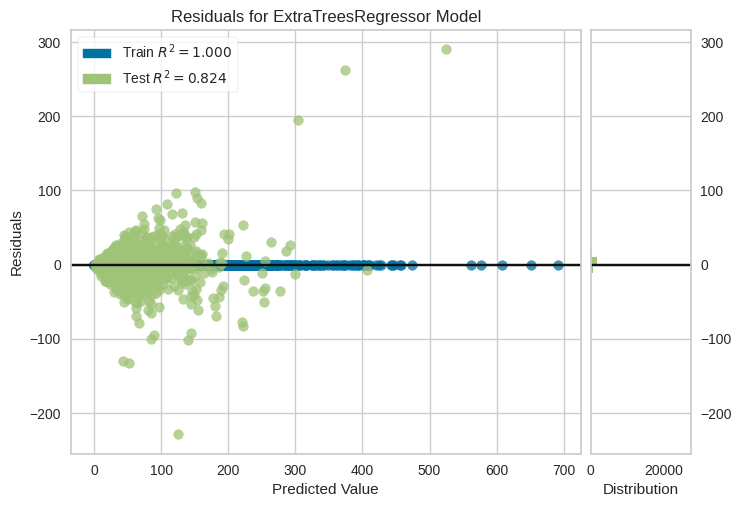

In [ ]:
plot_model(best,plot='residuals')

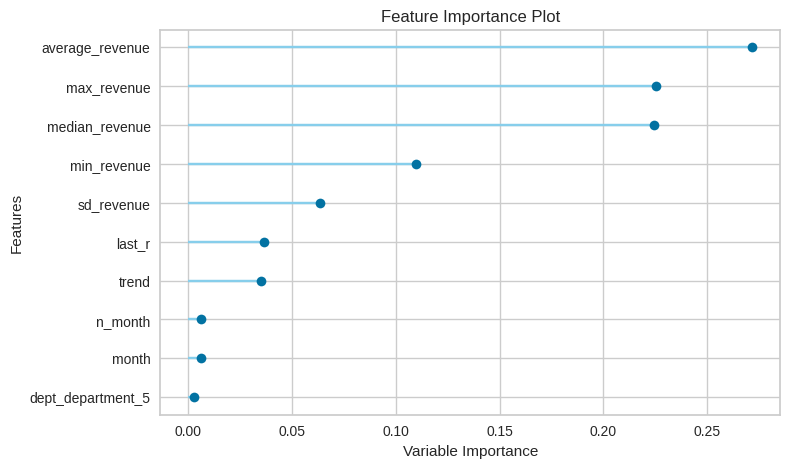

In [ ]:
plot_model(best,plot='feature')

In [ ]:
lr= create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0570,631.6177,25.1320,0.6475,0.6383,0.7919
1,13.3885,374.0565,19.3405,0.6359,0.6225,0.8115
2,13.3091,692.3750,26.3130,0.6211,0.5440,0.5540
Mean,13.9182,566.0164,23.5952,0.6348,0.6016,0.7191
Std,0.8059,137.9839,3.0469,0.0108,0.0413,0.1170


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lgbm= create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.4507,227.0626,15.0686,0.8733,0.2959,0.2339
1,5.8940,105.9312,10.2923,0.8969,0.2543,0.1934
2,6.3663,221.7405,14.8910,0.8786,0.2553,0.1916
Mean,6.5704,184.9115,13.4173,0.8829,0.2685,0.2063
Std,0.6517,55.8897,2.2109,0.0101,0.0194,0.0195


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_tuned=tune_model(lr,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.9002,631.7697,25.1350,0.6474,0.6338,0.7707
1,13.2524,368.7124,19.2019,0.6411,0.6106,0.7862
2,13.3143,700.5600,26.4681,0.6166,0.5314,0.5447
Mean,13.8223,567.0140,23.6017,0.6350,0.5919,0.7005
Std,0.7626,143.0051,3.1584,0.0133,0.0438,0.1104


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
lgbm_tuned=tune_model(lgbm,n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.3414,219.1937,14.8052,0.8777,0.2938,0.2290
1,5.7528,104.8883,10.2415,0.8979,0.2477,0.1856
2,6.3502,237.1661,15.4002,0.8702,0.2528,0.1856
Mean,6.4815,187.0827,13.4823,0.8819,0.2648,0.2001
Std,0.6551,58.5815,2.3044,0.0117,0.0206,0.0205


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt= create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.5514,413.3263,20.3304,0.7669,0.3936,0.2498
1,6.9013,244.2324,15.6279,0.7677,0.3369,0.2029
2,7.1563,301.6442,17.3679,0.8336,0.3418,0.1974
Mean,7.5363,319.7343,17.7754,0.7894,0.3574,0.2167
Std,0.7253,70.2074,1.9413,0.0313,0.0257,0.0235


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ensemble= ensemble_model(dt,method='Boosting',n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.9327,280.4390,16.7463,0.8418,0.3181,0.2041
1,5.3738,139.3691,11.8055,0.8674,0.2797,0.1698
2,5.9625,323.2952,17.9804,0.8216,0.2878,0.1723
Mean,6.0897,247.7011,15.5107,0.8436,0.2952,0.1821
Std,0.6427,78.5750,2.6680,0.0187,0.0165,0.0156


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
bended= blend_models([lr_tuned,lgbm_tuned,ensemble])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0021,263.4614,16.2315,0.8514,0.4349,0.3693
1,7.6222,136.0427,11.6637,0.8706,0.4419,0.3575
2,7.8507,303.0080,17.4071,0.8328,0.3681,0.2840
Mean,8.1583,234.1707,15.1008,0.8516,0.4149,0.3369
Std,0.6039,71.2405,2.4773,0.0154,0.0333,0.0378


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacked= stack_models([lr_tuned,lgbm_tuned,ensemble])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.5129,239.6801,15.4816,0.8648,0.3052,0.2349
1,6.0744,105.5285,10.2727,0.8996,0.2650,0.2171
2,6.3505,221.1668,14.8717,0.8780,0.2566,0.1952
Mean,6.6460,188.7918,13.5420,0.8808,0.2756,0.2157
Std,0.6233,59.3592,2.3251,0.0143,0.0212,0.0162


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
final_lgb= finalize_model(lgbm_tuned)

In [ ]:
final_lgb.get_params()

{'memory': Memory(location=None),
 'steps': [('numerical_imputer',
   TransformerWrapper(include=['trend', 'month', 'average_revenue', 'min_revenue',
                               'max_revenue', 'median_revenue', 'sd_revenue',
                               'n_month', 'last_r'],
                      transformer=SimpleImputer())),
  ('categorical_imputer',
   TransformerWrapper(include=['dept', 'family', 'subfamily', 'section', 'brand',
                               'type'],
                      transformer=SimpleImputer(strategy='most_frequent'))),
  ('rare_category_grouping',
   TransformerWrapper(include=['dept', 'family', 'subfamily', 'section', 'brand',
                               'type'],
                      transformer=RareCategoryGrouping(rare_to_value=0.1,
                                                       value='others'))),
  ('onehot_encoding',
   TransformerWrapper(include=['dept', 'family', 'subfamily', 'section', 'brand',
                               'type']

In [ ]:
sales_series.loc[sales_series.type=='future','total_revenue']=(predict_model(final_lgb,
                                            sales_series[sales_series.type=='future'].drop(
    'total_revenue',axis=1))[['prediction_label']].values)**2

In [ ]:
sales_series

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r
0,2021-01,department_1/family_1/subfamily_1/section_1/br...,17560.952370,department_1,family_1,subfamily_1,section_1,brand_1,history,1,1,12977.517457,6693.33332,17560.952370,14678.26668,5629.893151,31,1117.14286
2484,2021-02,department_1/family_1/subfamily_1/section_1/br...,8779.047620,department_1,family_1,subfamily_1,section_1,brand_1,history,2,2,6056.190470,3446.66665,8779.047620,5942.85714,2667.996446,31,1117.14286
4968,2021-03,department_1/family_1/subfamily_1/section_1/br...,11295.238090,department_1,family_1,subfamily_1,section_1,brand_1,history,3,3,6519.047620,1064.76190,11295.238090,7197.14287,5148.836824,31,1117.14286
7452,2021-04,department_1/family_1/subfamily_1/section_1/br...,2375.619050,department_1,family_1,subfamily_1,section_1,brand_1,history,4,4,3428.952380,2375.61905,4516.952390,3394.28570,1071.087509,31,1117.14286
9936,2021-05,department_1/family_1/subfamily_1/section_1/br...,7111.838567,department_1,family_1,subfamily_1,section_1,brand_1,history,5,5,3103.946186,1064.76190,7111.838567,1135.23809,3471.115488,31,1117.14286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109295,2024-08,department_9/family_24/subfamily_24/section_55...,13.361778,department_9,family_24,subfamily_24,section_55,brand_326,future,44,8,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
111779,2024-09,department_9/family_24/subfamily_24/section_55...,13.361778,department_9,family_24,subfamily_24,section_55,brand_326,future,45,9,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
114263,2024-10,department_9/family_24/subfamily_24/section_55...,13.361778,department_9,family_24,subfamily_24,section_55,brand_326,future,46,10,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857
116747,2024-11,department_9/family_24/subfamily_24/section_55...,13.361778,department_9,family_24,subfamily_24,section_55,brand_326,future,47,11,11.428570,11.42857,11.428570,11.42857,0.000000,1,11.42857


In [ ]:
import plotly.express as px

In [ ]:
keys[1]

'department_1/family_1/subfamily_1/section_1/brand_174'

In [ ]:
key1= keys[16]
data= sales_series.loc[sales_series.key== key1,]
data['date']= pd.to_datetime(data['year_month'].dt.strftime('%b-%Y'))

In [ ]:
data

,year_month,key,total_revenue,dept,family,subfamily,section,brand,type,trend,month,average_revenue,min_revenue,max_revenue,median_revenue,sd_revenue,n_month,last_r,date
16,2021-01,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,1,1,4304.033330,4181.42857,4426.63809,4304.033330,173.389314,18,830.4762,2021-01-01
2500,2021-02,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,2,2,5946.809525,1389.80952,10503.80953,5946.809525,6444.571211,18,830.4762,2021-02-01
4984,2021-03,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,3,3,2422.690485,266.33333,4579.04764,2422.690485,3049.549534,18,830.4762,2021-03-01
7468,2021-04,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,4,4,185.714290,185.71429,185.71429,185.714290,2814.354576,18,830.4762,2021-04-01
9952,2021-05,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,5,5,563.809520,187.61905,939.99999,563.809520,532.013665,18,830.4762,2021-05-01
12436,2021-06,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,6,6,830.476200,830.47620,830.47620,830.476200,2814.354576,18,830.4762,2021-06-01
14920,2021-07,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,7,7,626.666660,626.66666,626.66666,626.666660,2814.354576,18,830.4762,2021-07-01
17404,2021-08,department_1/family_1/subfamily_131/section_1/...,NaN,department_1,family_1,subfamily_131,section_1,brand_13,history,8,8,1898.714300,1898.71430,1898.71430,1898.714300,2814.354576,18,830.4762,2021-08-01
19888,2021-09,department_1/family_1/subfamily_131/section_1/...,1138.095220,department_1,family_1,subfamily_131,section_1,brand_13,history,9,9,1138.095220,1138.09522,1138.09522,1138.095220,2814.354576,18,830.4762,2021-09-01
22372,2021-10,department_1/family_1/subfamily_131/section_1/...,3737.142820,department_1,family_1,subfamily_131,section_1,brand_13,history,10,10,2025.238075,313.33333,3737.14282,2025.238075,2420.998908,18,830.4762,2021-10-01


In [ ]:
px.line(data,x='date',y='total_revenue',color='type')

In [ ]:
key2= keys[20]
key2

'department_1/family_1/subfamily_131/section_1/brand_193'

In [ ]:
key2= keys[20]
data= sales_series.loc[sales_series.key== key2,]
data['date']= pd.to_datetime(data['year_month'].dt.strftime('%b-%Y'))

In [ ]:
px.line(data,x='date',y='total_revenue',color='type')